在上一篇中实现了一个区块链原型，而真正的区块链是一种去中心化的分布式账本系统。在分布式系统中，往往需要在各个节点之间保持一致性，这种保持一致性的算法叫做共识算法。常用的共识机制有工作量证明(POW)、权益证明(POS)、委任权益证明(DPos)、委任权益证明(DPos)等。下面简单介绍下各种共识机制的原理及其优缺点。

>工作量证明(Proof Of Work)，简称POW，就是通常说的挖矿，通过机器运算，计算出一个满足规则的随机数(Nonce)，即获得本次记账权，广播至全网其它节点验证后记录区块链。

>优点：完全去中心化，节点自由进出；

>缺点：计算造成大量的资源浪费；共识达成的周期较长

>权益证明(Proof of Stake)，简称POS，节点记账权的获得难度与节点持有的权益成反比，相对于PoW，一定程度减少了数学运算带来的资源消耗，性能也得到了相应的提升，但依然是基于哈希运算竞争获取记账权的方式，可监管性弱。该共识机制容错性和PoW相同。Pow的一种升级共识机制；根据每个节点所占代币的比例和时间；等比例的降低挖矿难度，从而加快找随机数的速度。

>优点：在一定程度上缩短了共识达成的时间

>缺点：还是需要挖矿，本质上没有解决商业应用的痛点

>委任权益证明(Delegated Proof of Stake)，简称(DPos), 类似于董事会投票，让每一个持有比特股的人进行投票，由此产生一定数量的代表 , 让这些代表来代理执行验证和记账。从某种角度来看，DPOS有点像是议会制度或人民代表大会制度。如果代表不能履行他们的职责（当轮到他们时，没能生成区块），他们会被除名，网络会选出新的超级节点来取代他们。

>优点：大幅缩小参与验证和记账节点的数量，可以达到秒级的共识验证

>缺点：实现比较复杂

接下来，在原型的基础上加入一种共识机制，这里实现的是是比特币的工作量证明机制。比特币使用Hashcash ，一个最初用来防止垃圾邮件的工作量证明算法。它步骤如下：

1. 取一些公开的数据（比如，如果是 email 的话，它可以是接收者的邮件地址；在比特币中，它是区块头）
2. 给这个公开数据添加一个计数器。计数器默认从 0 开始
3. 将 data(数据) 和 counter(计数器) 组合到一起，获得一个哈希
4. 检查哈希是否符合一定的条件： 1.如果符合条件，结束 2.如果不符合，增加计数器，重复步骤 3-4

其中哈希要满足的必要条件，在原始的 Hashcash 实现中，它的要求是 “一个哈希的前20位必须是0”。在比特币中，这个要求会随着时间而不断变化。因为按照设计，必须保证每10分钟生成一个块，而不论计算能力会随着时间增长还是越来越多的矿工加入，所以比特币的挖矿越来越难。这里在本地尝试计算下不同条件下计算工作量证明需要的次数和时间。

In [23]:
from hashlib import sha256
import time
import random
import string

def random_data():
    return ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))


def mine(data, difficulty=1):
    """
        挖矿函数
            data：数据
            difficulty: 困难值，即计算的哈希值要满足的条件
    """
    i = 0
    prefix = '0' * difficulty
    start_time = time.time()
    while True:
        nonce = str(i)
        message = sha256()
        message.update(data.encode("utf-8"))
        message.update(nonce.encode("utf-8"))
        digest =message.hexdigest()
        if digest.startswith(prefix):
            return nonce, i, time.time() - start_time
        i += 1

In [37]:
# 准备测试数据
test_data = []
for i in range(5):
    test_data.append(random_data())

In [38]:
test_data

['FLJTF8AM0J', 'DT7ARXBE5N', 'ZQV5UH860S', '8TSN4UP9VI', 'N0MUVKLDU6']

In [44]:
# 计算消耗次数和时间

difficulties = [i+1 for i in range(6)]
n_iters = []
cost_times = []

for i in difficulties:
    print("##################################")
    print("Difficult: {}".format(i))
    n_iter = 0
    cost_time = 0
    for data in test_data:
        print("----------------------------")
        print("data: {}".format(data))
        nonce, n, t = mine(data, i)
        print("Iter: {}, Cost Time: {} sec".format(n, t))
        n_iter += n
        cost_time += t
    n_iters.append(n_iter / len(test_data))
    cost_times.append(cost_time / len(test_data))

##################################
Difficult: 1
----------------------------
data: FLJTF8AM0J
Iter: 59, Cost Time: 0.00021505355834960938 sec
----------------------------
data: DT7ARXBE5N
Iter: 8, Cost Time: 5.602836608886719e-05 sec
----------------------------
data: ZQV5UH860S
Iter: 29, Cost Time: 0.0001571178436279297 sec
----------------------------
data: 8TSN4UP9VI
Iter: 19, Cost Time: 8.893013000488281e-05 sec
----------------------------
data: N0MUVKLDU6
Iter: 15, Cost Time: 0.00010418891906738281 sec
##################################
Difficult: 2
----------------------------
data: FLJTF8AM0J
Iter: 102, Cost Time: 0.0005571842193603516 sec
----------------------------
data: DT7ARXBE5N
Iter: 233, Cost Time: 0.0013020038604736328 sec
----------------------------
data: ZQV5UH860S
Iter: 162, Cost Time: 0.0007348060607910156 sec
----------------------------
data: 8TSN4UP9VI
Iter: 70, Cost Time: 0.00030303001403808594 sec
----------------------------
data: N0MUVKLDU6
Iter: 241, Cost 

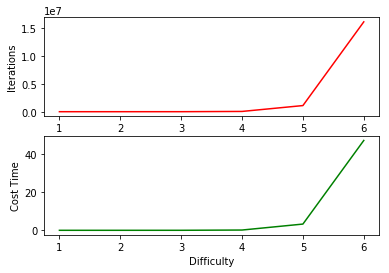

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1) 
plt.xlabel('Difficulty')
plt.ylabel('Iterations')
plt.plot(difficulties, n_iters, 'r')
plt.subplot(2, 1, 2)
plt.xlabel('Difficulty')
plt.ylabel('Cost Time')
plt.plot(difficulties, cost_times, 'g')
plt.show()

可以看到随着难度值增加，计算量和消耗时间也是不断增加，而且不同的数据计算所需时间也不同。

这里为了方便，将难度值固定为4，更新工作量证明到代码中。

In [50]:
# pow.py

# -*- coding: utf-8 -*-
import hashlib


class ProofOfWork():
    """
        工作量证明
    """
    def __init__(self, block, difficult=4):
        self.block = block
        self.difficulty = difficult

    def mine(self):
        """
            挖矿函数
        """
        i = 0
        prefix = '0' * self.difficulty

        while True:
            nonce = str(i)
            message = hashlib.sha256()
            message.update(str(self.block.prev_hash).encode('utf-8'))
            message.update(str(self.block.data).encode('utf-8'))
            message.update(str(self.block.timestamp).encode('utf-8'))
            message.update(nonce.encode("utf-8"))
            digest = message.hexdigest()
            if digest.startswith(prefix):
                return nonce, digest
            i += 1

    def validate(self):
        """
            验证有效性
        """
        message = hashlib.sha256()
        message.update(str(self.block.prev_hash).encode('utf-8'))
        message.update(str(self.block.data).encode('utf-8'))
        message.update(str(self.block.timestamp).encode('utf-8'))
        message.update(str(self.block.nonce).encode('utf-8'))
        digest = message.hexdigest()

        prefix = '0' * self.difficulty
        return digest.startswith(prefix)

其余更新可到GitHub上v2分支进行查看，更新后的区块哈希值都是以0000开头。

![blockchain_v2.png](blockchain_v2.png)